<a href="https://colab.research.google.com/github/bhavinithak/DeepLearning_Pytorch/blob/main/DogBreedIdentification_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm

In [ ]:
!pip install gradio

In [3]:
from fastai.vision.all import *
import gradio as gr
import timm

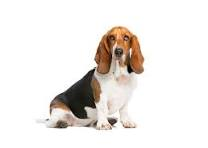

In [4]:
im = PILImage.create('basset.jpeg')
im.thumbnail((224,224))
im

In [5]:
learn=load_learner('dog_breeder_model.pkl')

In [6]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([1.8882e-05, 1.5050e-06, 7.9829e-07, 1.1154e-06, 1.1707e-06, 9.9470e-06,
         2.4044e-05, 1.0811e-06, 3.1484e-06, 3.8804e-06, 1.7223e-05, 7.5890e-07,
         1.8602e-07, 9.5250e-07, 9.9861e-01, 7.6558e-04, 4.5821e-07, 8.4977e-07,
         4.1284e-04, 6.9583e-06, 4.8196e-06, 1.6817e-06, 2.5215e-06, 9.8445e-07,
         2.0824e-05, 1.7437e-06, 4.2961e-06, 9.3442e-06, 1.4880e-05, 3.6655e-06,
         4.6372e-06, 3.4973e-06, 5.2330e-06, 1.8061e-05, 1.0744e-05, 6.2990e-07,
         6.3109e-06]))

In [7]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_image(im)

{'Abyssinian': 1.8882352378568612e-05,
 'Bengal': 1.5049580497361603e-06,
 'Birman': 7.982876013556961e-07,
 'Bombay': 1.1154307912875083e-06,
 'British_Shorthair': 1.1707173825925565e-06,
 'Egyptian_Mau': 9.946999853127636e-06,
 'Maine_Coon': 2.4044220481300727e-05,
 'Persian': 1.0811322681547608e-06,
 'Ragdoll': 3.1483675684285117e-06,
 'Russian_Blue': 3.880436452163849e-06,
 'Siamese': 1.7223070244654082e-05,
 'Sphynx': 7.588998300889216e-07,
 'american_bulldog': 1.860163223454947e-07,
 'american_pit_bull_terrier': 9.524984534436953e-07,
 'basset_hound': 0.9986146688461304,
 'beagle': 0.0007655785884708166,
 'boxer': 4.582073245273932e-07,
 'chihuahua': 8.497662520312588e-07,
 'english_cocker_spaniel': 0.00041283975588157773,
 'english_setter': 6.95831113262102e-06,
 'german_shorthaired': 4.819628429686418e-06,
 'great_pyrenees': 1.6816694596855086e-06,
 'havanese': 2.521506075936486e-06,
 'japanese_chin': 9.8445241292211e-07,
 'keeshond': 2.0823943486902863e-05,
 'leonberger': 1.74

In [12]:
image = gr.Image(height=192, width=192)
label = gr.components.Label()
examples = ['basset.jpeg']

In [13]:
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dda3a3cdb1968b515a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [14]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [15]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 4.9267e+00, -1.0120e-02,  1.1229e+00,  3.4997e-01,  1.9989e-01,
          4.7772e-01, -8.7762e-03,  1.9129e+00,  3.0254e+00,  1.5560e+00,
          5.8126e-01,  1.1860e-03,  3.3808e+00,  1.2347e+00, -5.8281e-03,
          2.1272e+00,  1.7260e+00,  7.8096e-01,  2.3192e+00,  3.1638e+00,
          1.6733e+00,  1.3218e+00,  3.6870e-01,  2.2167e+00,  1.8442e-01,
          1.5429e-01,  1.8194e+00, -6.7628e-03,  2.3793e+00,  3.6737e+00,
          4.0111e-01,  1.1293e-02,  3.6715e-01,  1.2003e+00,  7.2480e-01,
          2.8410e-01,  2.4173e+00,  3.0963e-01,  7.0923e-01,  6.3421e-01,
          7.8653e-01,  7.0021e-04,  2.8177e-01,  5.4472e-01,  8.0806e-01,
          3.3338e-01,  7.9642e-01,  5.9966e-01,  1.9881e-01,  3.4812e-01,
          2.2378e+00,  1.0382e-02,  1.1585e+00, -5.4462e-03,  3.2378e+00,
          5.8512e-01,  2.2213e-01,  4.1913e+00,  2.9568e-01,  8.4083e-01,
         -2.0596e-03,  6.7326e-03,  6.6543e-01,  2.4127e-01,  1.2580e+00,
          2.759

In [16]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[-0.0548, -0.0274, -0.0113,  ...,  0.0162,  0.0374, -0.0030],
         [ 0.0018, -0.0522,  0.0143,  ..., -0.0251, -0.0423,  0.0049],
         [-0.0103,  0.0004, -0.0078,  ..., -0.0394, -0.0060, -0.0003],
         ...,
         [-0.0040, -0.0124, -0.0327,  ..., -0.0213, -0.0051,  0.0024],
         [ 0.0304,  0.0005,  0.0192,  ...,  0.0491, -0.0116, -0.0041],
         [-0.0075,  0.0014, -0.0085,  ...,  0.0120,  0.0137,  0.0041]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.8709, -0.7154, -1.0197, -1.0518, -0.5569, -0.8993, -0.7452, -1.1259,
         -0.9348, -1.1854, -0.8043, -0.7970,  0.1005, -1.5095, -0.9240, -0.6480,
          0.6851, -1.1376, -0.0262, -1.0960, -0.8625, -0.7150, -0.6820,  0.2149,
         -1.6132, -0.6693, -0.4568, -0.0345, -0.6726, -0.4705, -0.8045,  0.0035,
         -0.4164,  1.1498, -0.9722, -0.2357, -0.8716, -1.0912, -0.5575,  0.1452,
         -1.3999,  0.1282, -0.4642, -0.5792,  0.0432, -1.1842,  0.1650, -1.1269